**DS 301: Applied Data Modeling and Predictive Analysis**

**Lecture 5 – Binary Classification and Performance Measures**

# Binary Classifier with MNIST Dataset

Justin Park, 19 September 2022

**Credit:** The large portion of the code has been taken from Chapter 3 of Aurélien Géron, Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow

## Get, Visualize, and Prepare the Data for Machine Learning

**Load the mnist handwritten digit dataset**

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

data_path = os.path.join("datasets", "german_credit_data.csv")
df = pd.read_csv(data_path)
df.head(10)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
5,5,35,male,1,free,NaN,NaN,9055,36,education,good
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,7,35,male,3,rent,little,moderate,6948,36,car,good
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,9,28,male,3,own,little,moderate,5234,30,car,bad


In [2]:
x, y = df[["Age", "Job", "Credit amount", "Duration"]], df[["Risk"]]
print(x.shape)
print(y.shape)

(1000, 4)
(1000, 1)


In [3]:
df["Risk" ["good", "bad"]] = ["1", "0"]

TypeError: string indices must be integers

**Train Using Decision Tree**

In [28]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x, y)

**Train Using KNN**

In [29]:
knn_clf = KNeighborsClassifier(n_neighbors=7)
knn_clf.fit(x, y)

C:\Users\justi\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

## Performance Measures

**1. Training Accuracy**

In [30]:
from sklearn import metrics
clf_pred = clf.predict(x)
knn_clf_pred = knn_clf.predict(x)
print(metrics.accuracy_score(y, clf_pred))
print(metrics.accuracy_score(y, knn_clf_pred))

1.0
0.745


**2. Cross-Validation Accuracy**

In [39]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(clf, x, y, cv=3, scoring="accuracy"))
print(cross_val_score(knn_clf, x, y, cv=3, scoring="accuracy"))

[0.61377246 0.60960961 0.62462462]
[0.64371257 0.65165165 0.65165165]


C:\Users\justi\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\justi\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\justi\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


**3. Confusion Matrix**

In [50]:
# Get the predictions made on each test fold
# With cross_val_predict, the data is split according to the cv parameter.
# Each sample belongs to exactly one test set, and its prediction is computed 
# with an estimator fitted on the corresponding training set.
from sklearn.model_selection import cross_val_predict
clf_pred = cross_val_predict(clf, x, y, cv=3)
knn_clf_pred = cross_val_predict(knn_clf, x, y, cv=3)

# Compute the confusion matrix by passing the target (y_train_5)
# and the prediction (y_train_pred)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, clf_pred))
print(confusion_matrix(y, knn_clf_pred))
print(y)
print(clf_pred)

[[119 181]
 [197 503]]
[[ 47 253]
 [ 98 602]]
     Risk
0    good
1     bad
2    good
3    good
4     bad
..    ...
995  good
996  good
997  good
998   bad
999  good

[1000 rows x 1 columns]
['good' 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'good'
 'good' 'bad' 'bad' 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good'
 'good' 'good' 'good' 'good' 'bad' 'bad' 'good' 'bad' 'good' 'good' 'good'
 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'bad'
 'good' 'good' 'good' 'bad' 'good' 'bad' 'bad' 'bad' 'good' 'bad' 'bad'
 'good' 'good' 'bad' 'good' 'bad' 'good' 'good' 'good' 'bad' 'good' 'bad'
 'bad' 'good' 'bad' 'bad' 'good' 'good' 'bad' 'good' 'good' 'good' 'good'
 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'bad'
 'bad' 'good' 'good' 'good' 'bad' 'bad' 'good' 'good' 'bad' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'bad' 'good' 'good'
 'good

C:\Users\justi\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\justi\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\justi\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


**4. Precision, Recall and F1 Score**

In [53]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y, clf_pred, pos_label = "good")
knn_precision = precision_score(y, knn_clf_pred, pos_label = "good")
recall = recall_score(y, clf_pred, pos_label = "good")
knn_recall = recall_score(y, knn_clf_pred, pos_label = "good")
print("decision tree precision: ", precision)
print("decision tree recall:    ", recall)
print("knn precision: ", knn_precision)
print("knn recall:    ", knn_recall)

decision tree precision:  0.7353801169590644
decision tree recall:     0.7185714285714285
knn precision:  0.704093567251462
knn recall:     0.86


In [57]:
from sklearn.metrics import f1_score
f1 = f1_score(y, clf_pred, pos_label = "good")
knn_f1 = f1_score(y, knn_clf_pred, pos_label = "good")
print("decision tree f1 score: ", f1)
print("knn f1 score: ", knn_f1)

decision tree f1 score:  0.726878612716763
knn f1 score:  0.7742765273311898


Precision/Recall Trade-off

In [60]:
# Use precision_recall_curve to compute precision and recall 
# for all possible thresholds
from sklearn.metrics import precision_recall_curve
clf_scores = cross_val_predict(clf, x, y, cv=3, 
                             method="predict_proba")
knn_clf_scores = cross_val_predict(knn_clf, x, y, cv=3, 
                             method="predict_proba")
precisions, recalls, thresholds = precision_recall_curve(y, clf_scores)
precisions, recalls, thresholds = precision_recall_curve(y, knn_clf_scores)

C:\Users\justi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1097: RuntimeWarning: Number of classes in training fold (2) does not match total number of classes (1). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  RuntimeWarning,


IndexError: index 1 is out of bounds for axis 1 with size 1

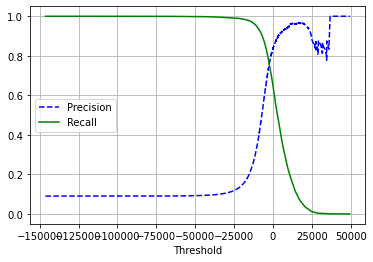

In [14]:
# Plot precision and recall versus the decision threshold
# The length of precisions and the length of recalls is 1 more than that of thresholds.
# The last element of precisions is always 1 and the last element of recalls is always 0.
import matplotlib.pyplot as plt
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.grid()
plt.legend()
plt.xlabel("Threshold")
plt.show()

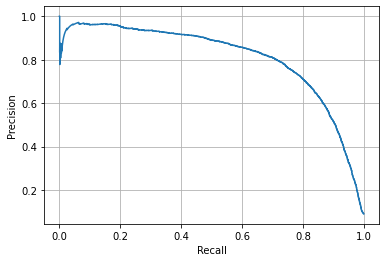

In [15]:
# Plot precision versus recall
plt.plot(recalls, precisions)
plt.grid()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [16]:
# Get a lowest threshold that gives at least 90% precision
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

y_train_pred_90 = (y_scores >= threshold_90_precision)
precision = precision_score(y_train_5, y_train_pred_90)
recall = recall_score(y_train_5, y_train_pred_90)
print("precision: ", precision)
print("recall:    ", recall)

precision:  0.9000345901072293
recall:     0.4799852425751706


**5. The ROC Curve**

In [17]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

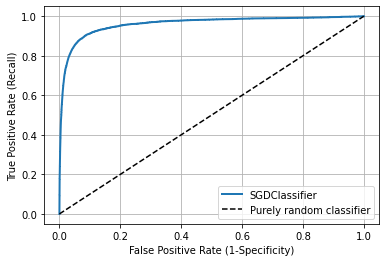

In [18]:
# Plot tpr versus fpr
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, linewidth=2, label="SGDClassifier")
plt.plot([0, 1], [0, 1], 'k--', label="Purely random classifier") # Dashed diagonal
plt.grid()
plt.legend()
plt.xlabel("False Positive Rate (1-Specificity)")
plt.ylabel("True Positive Rate (Recall)")
plt.show()

In [19]:
# Measure the area under the curve (AUC)
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616